### Importing Libraries

In [128]:
import pyodbc as py
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot

### SQL Connection

In [129]:
conn=py.connect('Driver={ODBC Driver 17 for SQL Server};'
               'Server=localhost\SQLEXPRESS;'
               'Database=DataWareHouseProject;'
               'Trusted_Connection=yes;')
cursor=conn.cursor()

## Query 

In [130]:
sql="select RequestDate,count(LocumRequestID) as RequestCount from DW_LOCUMREQUEST group by RequestDate"

## Executing query and Storing  table into Dataframe

In [131]:
df=pd.read_sql(sql,conn,index_col='RequestDate',parse_dates=True)
df.head()

,RequestCount
RequestDate,
2002-01-23,3
2002-01-24,4
2002-01-25,2
2002-01-28,1
2002-01-30,5


## Extracting Request Count

In [157]:
X=df.values

In [158]:
X

array([[ 3],
       [ 4],
       [ 2],
       [ 1],
       [ 5],
       [ 5],
       [11],
       [ 6],
       [ 4],
       [ 1],
       [ 1],
       [ 2],
       [ 1],
       [ 1],
       [ 7],
       [ 2],
       [15],
       [ 2],
       [ 2],
       [ 1],
       [ 1],
       [ 1],
       [ 2],
       [ 4],
       [ 2],
       [ 1]], dtype=int64)

## Stationarity Check

In [160]:
def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [161]:
adf_test(df['RequestCount'])


1. ADF :  -2.4009626531559967
2. P-Value :  0.14146489127361234
3. Num Of Lags :  9
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 16
5. Critical Values :
	 1% :  -3.9240193847656246
	 5% :  -3.0684982031250003
	 10% :  -2.67389265625


**Visualising the data**

<AxesSubplot:xlabel='RequestDate'>

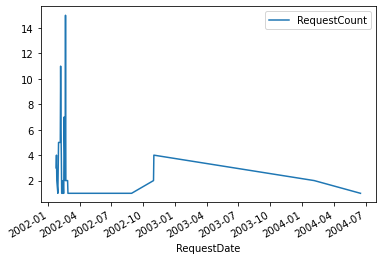

In [163]:
df.plot()

## Dataset Split

In [137]:
train=X[:len(X)-10]
test=X[len(X)-10:]

## Train the Model

In [147]:
model=AutoReg(train,lags=7).fit()

C:\Users\DELFY DAVIS\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [148]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   16
Model:                     AutoReg(7)   Log Likelihood                 -16.324
Method:               Conditional MLE   S.D. of innovations              1.484
Date:                Tue, 24 May 2022   AIC                              2.790
Time:                        02:06:00   BIC                              2.987
Sample:                             7   HQIC                             2.364
                                   16                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     12.7558      5.077      2.512      0.012       2.804      22.707
y.L1          -0.4483      0.339     -1.321      0.186      -1.113       0.217
y.L2           0.4358      0.329      1.324      0.1

## Prediction of values

In [149]:
pred=model.predict(start=len(train),end=len(X)-1,dynamic=False)

[12.64402786  3.17529879  7.4066225   3.23486887 -0.25438852  2.23609737
  0.57330062 -1.27294015  9.56669077 -1.69940735]


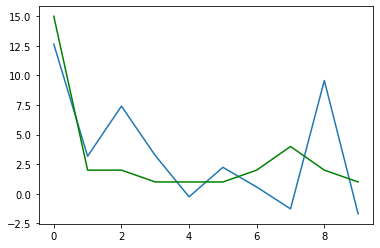

In [150]:
pyplot.plot(pred)
pyplot.plot(test,color='green')
print(pred)

**Error Calculation Using RMS**

In [151]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [152]:
rms=sqrt(mean_squared_error(test,pred))

In [153]:
print(rms)

3.7234465630779257


**Future Prediction Of Four Values**

In [154]:
future_pred=model.predict(start=len(X)+1,end=len(X)+4,dynamic=False)

In [155]:
future_pred

array([ 2.93042415,  7.11422015,  6.70085849, -2.11096265])